# M4101, Analyse de données, classification
### Cedric Chauve, cedric.chauve@sfu.ca

## Préliminaires

Dans ce calepin, nous allons explorer un problème classique en IA, la classification binaire supervisée. 
Avant de travailler avec nos données, on commence par importer quelques modules python importants.
- Numpy : pour des claculs (algèbre linéaire, etc)
- Pandas : pour la lecture des fichiers csv, etc 
- Matplotlib et seaborn pour la visualisation
- Scikit-learn pour l'apprentissage-machine

In [28]:
import numpy as np
import pandas as pa
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import sklearn

## Chargement des données

Les données que nous allons analyser font partie des exemples fournis avec Scikit-learn, on peut donc les charger facilement.

In [29]:
from sklearn.datasets import load_breast_cancer

Les datasets de Scikit-klearn sont, en général, bien formatés. Ils viennent avec une structure permettant de les visualiser et de les "fouiller" facilement. 

In [30]:
breast_cancer = load_breast_cancer()

print(breast_cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [31]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [32]:
print(breast_cancer.feature_names)
print(breast_cancer.data)

print(breast_cancer.target_names)
print(breast_cancer.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['malignant' 'benign']
[0 0 0 0 0 0 0

On peut voir que les données peuvent etre divisées en 10 catégories, et pour chacune on extrait trois attributs (valeur moyenne, déviation standard, valeur maximale). Pour nous simplifier la tâche, nous allons nous contenter des valeurs moyennes, donc de 10 attributs.

In [33]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
# Liste des attributs que nous allons prendre en compte.
ATTRIBUTS = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
# Nombre d'attributs
NB_ATT = len(ATTRIBUTS) 
# Attributs et donnees, encodes sous la forme d'une data frame pandas
X      = pa.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)[ATTRIBUTS]

In [35]:
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  
568                 0.05884  

[569 rows x 10 columns]

### Exercice

Qu'apprenons-nous sur ces données?

On peut voir les données mesurées sur chaque patiente comme une grosse **matrice** de 
- 569 lignes, chacune représentant une patiente (un **point de données**)
- 10 colonnes, chacune représentant un **attribut**
Chaque point de données est donc représenté par un vecteur de 10 attributs.   
Notez cependant que X est une data frame (les lignes et colonnes ont un label) et non pas une simple matrice.  
Si on voulait avoir une matrice, on devrait convertir dans le type "array" de numpy.

In [36]:
np.array(X)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

Pour faire de la classification, nous devons aussi connaître la nature de la tumeur de chaque patiente. 

In [37]:
# y : data frame encodant la classe de la tumeur
y = pa.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
print(y)
y = pa.get_dummies(y, drop_first=True)
print(y)
# y01: vecteur binaire indiquant la classe de chaque point de donnee (1 = benigne, 0 = maligne)
y01 = np.array(breast_cancer.target)
print(y01)

[malignant, malignant, malignant, malignant, malignant, ..., malignant, malignant, malignant, malignant, benign]
Length: 569
Categories (2, object): [malignant, benign]
     benign
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 

On a donc un vecteur binaire y01 de 569 entrées représenant la classe de la tumeur de chaque patiente. 

## Analyse préliminaire des données

Nous passons maintenant à une exploration statistique mais visuelle des attributs géométriques encodes dans notre matrice de données X.  
Pour cela nous allons utiliser deux commandes de pandas, *hist* qui permet de générer un histogramme des valeurs par attribut et *boxplot* qui génère une <a href="https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches">boîte à moustache</a> par attribut.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a7d7ad0>,
      dtype=object)

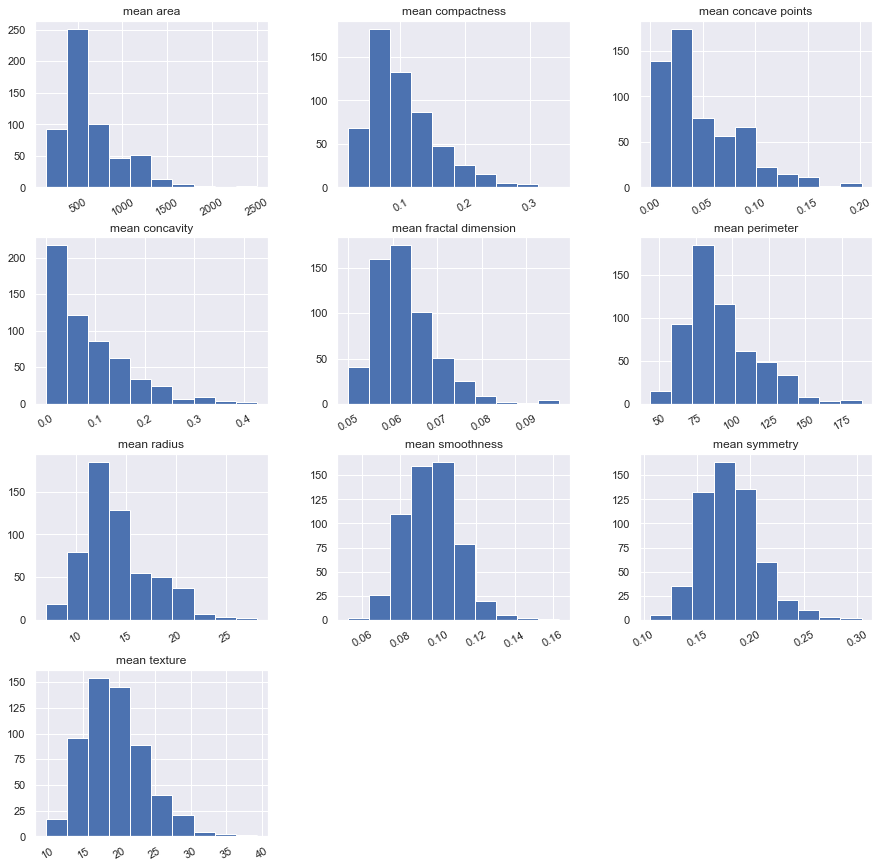

In [38]:
X.hist(figsize=(15,15), layout=(4,3), xrot=30)

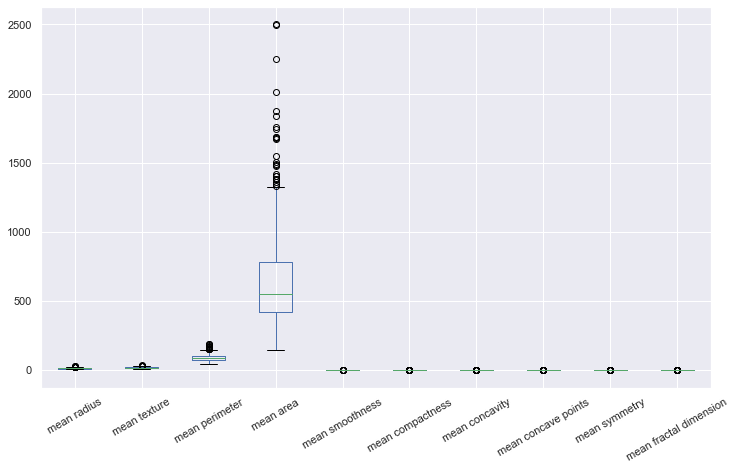

In [39]:
X.boxplot(figsize=(12,7),rot=30)

### Exercice

Qu'observez-vous sur ces données? Discutez?

### Standardisation des données

On crée une matrice Xstd obtenue en standardisant X.  
A partir de maintenant on travaillera sur cette matrice.

In [40]:
from sklearn import preprocessing

Xstd = pa.DataFrame(preprocessing.scale(X), columns = ATTRIBUTS)

In [41]:
Xstd.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  
0                2.255747  
1               -0.868652  
2               -0.398008  
3                4.910919  
4               -0.562450

Générons de nouveau des diagrammes boxplot pour verifier qu'on a bien atténué l'effet "écrasant" de l'attribut rayon moyen.

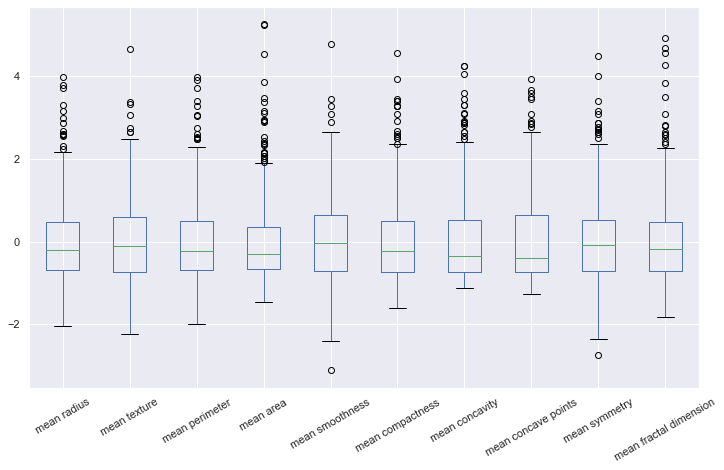

In [42]:
Xstd.boxplot(figsize=(12,7),rot=30)

On observe que les attributs semblent maintenant se comporter de manière relativement uniforme.

## Une premiere tentative de classification, visuelle, utilisant au plus deux attributs

On veut maintenant représenter graphiqument pour chaque paire d'attributs les points de données coloriés par classe de la tumeur, de manière à voir si il semble exister un ou deux attributs permettant de bien classifier.

In [43]:
# Pour cela on cree d'abord une data frame panda regroupant les attributs et la nature de la tumeur
Xstd_df = pa.DataFrame(Xstd, columns=ATTRIBUTS )
Xstd_df['target'] = y01
Xstd_df['label']  = Xstd_df.apply(lambda x: breast_cancer['target_names'][int(x.target)], axis=1)

In [46]:
Xstd_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  target      label  
0                2.255747       0  malignant  
1               -0.868652       0  malignant  
2               -0.398008       0  malignant  
3                4.910919       0  malignant  
4               -0.562450       0  malignant

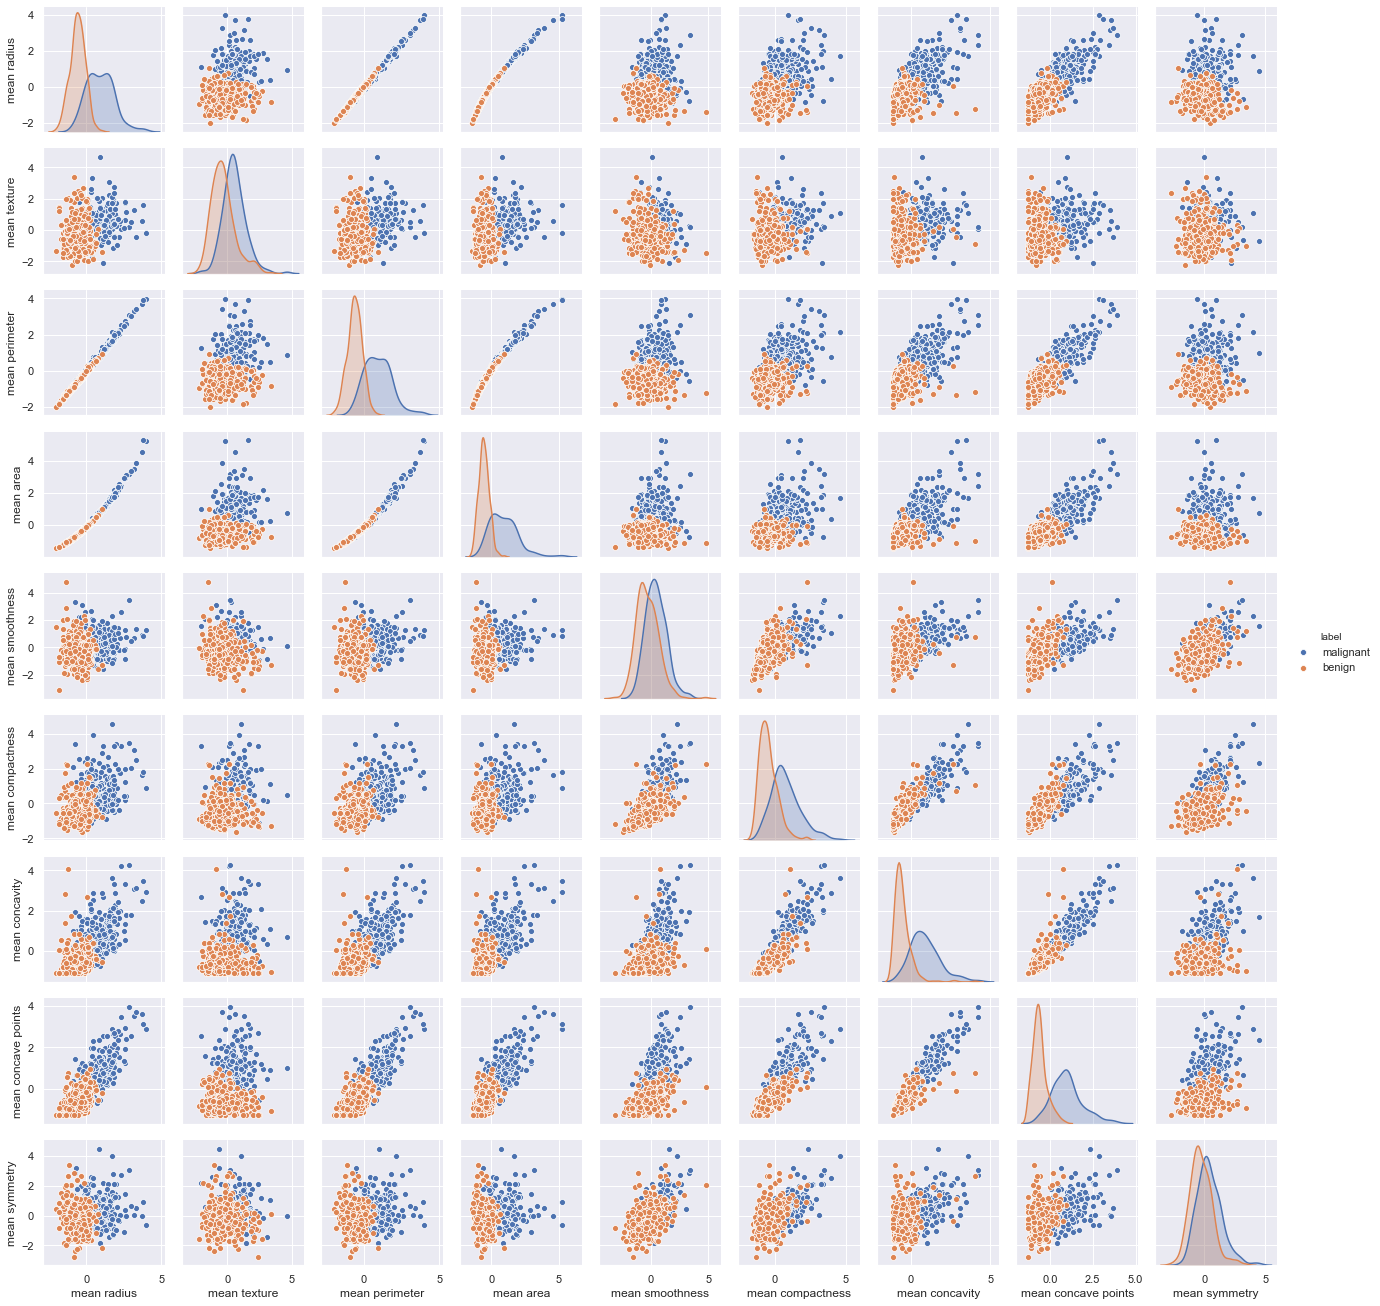

In [45]:
# Puis on utilise la fonction pairplot de seaborn
sns.pairplot(Xstd_df, hue='label', vars=breast_cancer.feature_names[0:9], height=2);

### Exercice

Votre avis?

## Classification avec KNN

On va utiliser un classifieur, k-nearest-neighbors, implémenté dans scikit-learn, et déterminer quelle paire d'attributs classifie le mieux nos données. 

### Exercice

Pour le moment on prend ce classifieur comme une boîte noire (i.e. on ne regarde pas son algorithme). 
Néammoins, observez le code qui suit et en utilisant l'aide de Scikit-learn (<a href="https://scikit-learn.org/stable/user_guide.html">lien vers l'aide</a>) essayez de comprendre ce que ce code fait.

In [47]:
from sklearn import neighbors
from sklearn import metrics

def clf_knn_test(X,y):
    clf_knn     = neighbors.KNeighborsClassifier()
    classifieur = clf_knn.fit(X,y)
    predictions = classifieur.predict(X)
    F1          = metrics.f1_score(y, predictions)
    exactitude  = metrics.accuracy_score(y, predictions)
    return({'F1':round(F1,4),'exact':round(exactitude,4)})

#### Exemple avec deux attributs
Regardons deux attributs qui semblent classifier pas trop mal, 'mean radius','mean perimeter'

In [48]:
ATT2_ex     = ['mean radius','mean perimeter']
ATT2_ex_knn = clf_knn_test(Xstd[ATT2_ex],y01)
print('Classification en utilisant mean radius/mean perimeter : exactitude='+str(ATT2_ex_knn['exact'])+'\tF1='+str(ATT2_ex_knn['F1']))

Classification en utilisant mean radius/mean perimeter : exactitude=0.9156	F1=0.9344


### Exercice

A vous de jouer maintenant, en considérant toutes les paires d'attributs et en graphant une boîte à moustache des scores F1 et d'exactitude.

In [49]:
F1_ATT2         = {}
EXACTITUDE_ATT2 = {}
ATT_PAIRES      = []
for att1 in ATTRIBUTS:
    for att2 in ATTRIBUTS:
        if att1>att2:
            ATT_PAIRES.append((att1,att2))
for ATT2 in ATT_PAIRES:
        ATT2_knn              = clf_knn_test(Xstd[[ATT2[0],ATT2[1]]],y01)
        F1_ATT2[ATT2]         = ATT2_knn['F1'] 
        EXACTITUDE_ATT2[ATT2] = ATT2_knn['exact']         

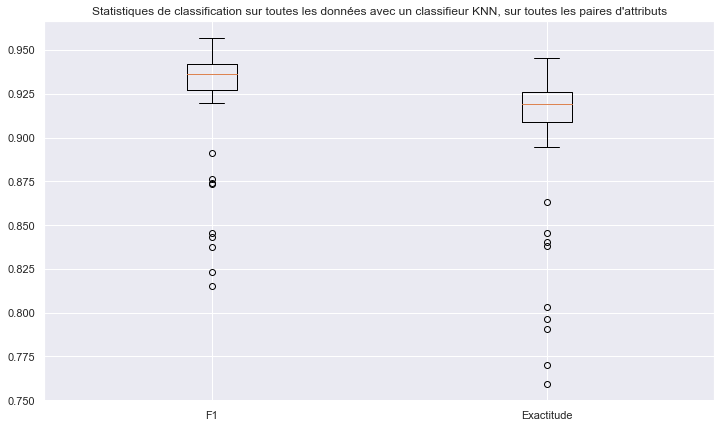

In [50]:
plt.figure(figsize=(12,7))
plt.boxplot([list(F1_ATT2.values()),list(EXACTITUDE_ATT2.values())],
           labels=['F1','Exactitude'])
plt.title('Statistiques de classification sur toutes les données avec un classifieur KNN, sur toutes les paires d\'attributs')
plt.show()

### Exercice

Commentez.

### Exercice
Trouver la paire d'attributs ayant la meilleure exactitude, la pire exactitude, le meilleur score F1, le pire score F1.

In [51]:
print('Meilleur exactitude :\t',max(EXACTITUDE_ATT2, key=EXACTITUDE_ATT2.get), max(EXACTITUDE_ATT2.values()))
print('Meilleur score F1 :\t',max(F1_ATT2, key=F1_ATT2.get), max(F1_ATT2.values()))
print()
print('Pire exactitude :\t',min(EXACTITUDE_ATT2, key=EXACTITUDE_ATT2.get), min(EXACTITUDE_ATT2.values()))
print('Pire score F1 :\t\t',min(F1_ATT2, key=F1_ATT2.get), min(F1_ATT2.values()))

Meilleur exactitude :	 ('mean concavity', 'mean area') 0.9455
Meilleur score F1 :	 ('mean concavity', 'mean area') 0.9568

Pire exactitude :	 ('mean symmetry', 'mean smoothness') 0.7592
Pire score F1 :		 ('mean symmetry', 'mean smoothness') 0.8151


In [52]:
ATT2_best      = ['mean concavity', 'mean area']
ATT2_best_knn  = clf_knn_test(Xstd[[ATT2_best[0],ATT2_best[1]]],y01)

## Réduction de la dimensionalité avec ACP

In [53]:
from sklearn.decomposition import PCA

Le code suivant extrait les deux premières CP de la matrice Xstd et utilise le classifieur KNN avec ces données.  
On compare le résultat avec les deux meilleurs attributs identifiés précédemment.

In [55]:
red_ACP2  = PCA(n_components=2)
Xpca2     = red_ACP2.fit_transform(Xstd)
ACP2_knn  = clf_knn_test(Xpca2,y01)
print('Classification avec l\'ACP a 2 composantes :\t exactitude='+str(ACP2_knn['exact'])+'\tF1='+str(ACP2_knn['F1']))
print('Meilleure classification avec 2 attributs :\t exactitude='+str(ATT2_best_knn['exact'])+'\tF1='+str(ATT2_best_knn['F1']))

Classification avec l'ACP a 2 composantes :	 exactitude=0.9525	F1=0.9627
Meilleure classification avec 2 attributs :	 exactitude=0.9455	F1=0.9568


Comparons visuellement la séparation de nos données avec l'ACP à deux CP et les deux meilleurs attributs identifiés précédemment.

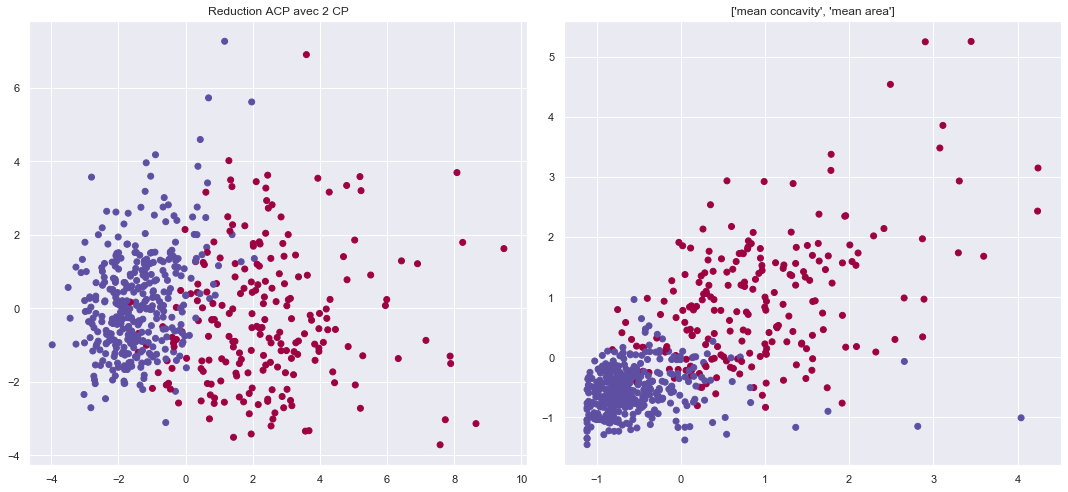

In [56]:
f1 = plt.figure(figsize=(15,7))
axACP  = f1.add_subplot(121)
axATT2 = f1.add_subplot(122)

axACP.scatter(Xpca2[:, 0], Xpca2[:, 1], c=y01, cmap=plt.cm.Spectral)
axACP.set_title('Reduction ACP avec 2 CP')

axATT2.scatter(Xstd[ATT2_best[0]], Xstd[ATT2_best[1]], c=y01, cmap=plt.cm.Spectral)
axATT2.set_title(str(ATT2_best))

plt.tight_layout()
plt.show()

### Exercice

Afficher les scores F1 et d'exactitude pour tous les nombres possibles de CP. Qu'observez-vous?

In [57]:
red_ACP = {} # Methode de reduction par ACP
Xpca    = {} # Matrice des n premieres CP
ACP_knn = {} # Prediction avec KNN en utilisant les n premieres CP 
for n in range(1,NB_ATT+1):
    red_ACP[n]  = PCA(n_components=n)
    Xpca[n]     = red_ACP[n].fit_transform(Xstd)
    ACP_knn[n]  = clf_knn_test(Xpca[n],y01)
    print('ACP a '+str(n)+' composantes :\texactitude='+str(ACP_knn[n]['exact'])+'\tF1='+str(ACP_knn[n]['F1']))

ACP a 1 composantes :	exactitude=0.9262	F1=0.9417
ACP a 2 composantes :	exactitude=0.9525	F1=0.9627
ACP a 3 composantes :	exactitude=0.949	F1=0.9602
ACP a 4 composantes :	exactitude=0.949	F1=0.9598
ACP a 5 composantes :	exactitude=0.9525	F1=0.9621
ACP a 6 composantes :	exactitude=0.9543	F1=0.9638
ACP a 7 composantes :	exactitude=0.9578	F1=0.9666
ACP a 8 composantes :	exactitude=0.9596	F1=0.968
ACP a 9 composantes :	exactitude=0.9596	F1=0.968
ACP a 10 composantes :	exactitude=0.9596	F1=0.968


## Réduction de la dimensionalité avec t-SNE et MDS

On regarde maintenant deux autres méthodes classiques de réduction de dimensionalité :
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html">Multi-Dimensional Scaling (MDS)</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.htmls">t-distributed Stochastic Neighbor Embedding (t-SNE</a>

### Exercice

Explorez le potentiel de classification de ces deux techniques, en deux dimensions (toujours en utilisant KNN pour classifier).

In [58]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [61]:
red_MDS  = MDS()
XMDS     = red_MDS.fit_transform(Xstd)
red_TSNE = TSNE()
XTSNE    = red_TSNE.fit_transform(Xstd)

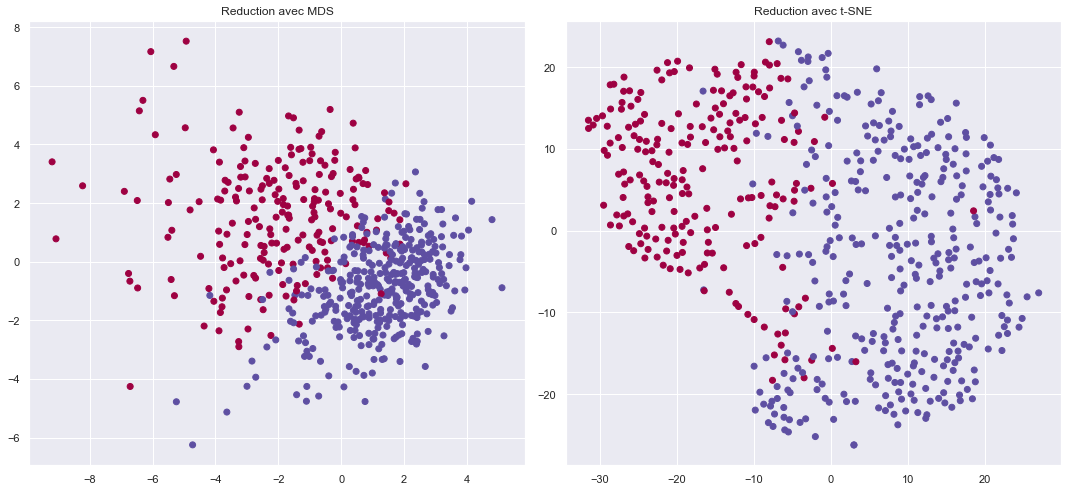

In [62]:
f_MDS_mds = plt.figure(figsize=(15,7))
axMDS  = f_MDS_mds.add_subplot(121)
axTSNE = f_MDS_mds.add_subplot(122)

axMDS.scatter(XMDS[:, 0], XMDS[:, 1], c=y01, cmap=plt.cm.Spectral)
axMDS.set_title('Reduction avec MDS')

axTSNE.scatter(XTSNE[:, 0], XTSNE[:, 1], c=y01, cmap=plt.cm.Spectral)
axTSNE.set_title('Reduction avec t-SNE')

plt.tight_layout()
plt.show()

In [63]:
MDS_knn  = clf_knn_test(XMDS,y01)
TSNE_knn = clf_knn_test(XTSNE,y01)

print('ACP à 2 composantes :\texactitude='+str(ACP2_knn['exact'])+'\tF1='+str(ACP2_knn['F1']))
print('Réduction MDS :\t\texactitude='+str(MDS_knn['exact'])+'\tF1='+str(MDS_knn['F1']))
print('Réduction t-SNE :\texactitude='+str(TSNE_knn['exact'])+'\tF1='+str(TSNE_knn['F1']))

ACP à 2 composantes :	exactitude=0.9525	F1=0.9627
Réduction MDS :		exactitude=0.9473	F1=0.9586
Réduction t-SNE :	exactitude=0.9578	F1=0.9664


##  Séparation en un jeu d'apprentissage et un jeu de test

Jusque-là nous avons évalué nos approches pour classifier en apprenant avec toutes les données.
On ne fait en général pas cela, et on découpe nos données en un jeu d'apprentissage et un jeu de test.
On peut faire cela aléatoirement avec scikit-learn en utilisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a>.

### Exercice

Reprenez l'expérience considérant l'ACP à plusieurs CP en ayant séparé nos données en jeu de test et jeu d'apprentisage.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, y, random_state=1)
y01_train = np.squeeze([x for [x] in np.array(y_train)])
y01_test  = np.squeeze([x for [x] in np.array(y_test)])

In [66]:
X_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
562     0.310345      2.636649        0.470844   0.176365         0.600616   
291     0.236501     -0.044132        0.208462   0.092180        -0.458325   
16      0.156977      0.195555        0.114137   0.084216         0.164372   
546    -1.081325     -0.684076       -1.098091  -0.938523        -0.143774   
293    -0.646783     -0.425771       -0.676715  -0.631929        -0.899551   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
562          1.977758        2.086645             1.170295       1.155090   
291         -0.115812       -0.369108            -0.018808       0.246006   
16          -0.612909       -0.186433             0.094686      -0.823721   
546         -1.030979       -0.987817            -1.120082       0.267911   
293         -0.908174       -0.777395            -0.673717       0.231402   

     mean fractal dimension  
562                1.236490  
291               -0.606396  
16                -0.507163  
546               -0.111652  
293               -0.800607

In [67]:
X_test.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
421     0.159817     -1.235591        0.257479   0.003444         0.479635   
47     -0.271884     -0.146523       -0.246689  -0.342115         1.383436   
292    -0.334368     -0.760869       -0.363670  -0.401556         0.294605   
186     1.187949     -0.165140        1.096935   1.098139        -0.745834   
414     0.284783      2.448156        0.195281   0.183760        -0.936557   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
421          1.502076        0.705598             0.363201       1.001751   
47           0.355511        0.424367             0.631459       1.155090   
292         -0.472100       -0.342114            -0.392562      -0.297985   
186         -0.372605       -0.089257             0.237843      -0.695938   
414         -1.104700       -0.526547            -0.555322       0.147430   

     mean fractal dimension  
421                1.596561  
47                 0.704888  
292                0.269684  
186               -1.211713  
414               -1.397419

In [68]:
Xtrain_ACP2 = red_ACP[2].fit_transform(X_train)
Xtest_ACP2  = red_ACP[2].transform(X_test)

In [69]:
def clf_knn_train_test(X_train,X_test,y_train,y_test):
    clf_knn     = neighbors.KNeighborsClassifier()
    classifieur = clf_knn.fit(X_train,y_train)
    predictions = classifieur.predict(X_test)
    F1          = metrics.f1_score(y_test, predictions)
    exactitude  = metrics.accuracy_score(y_test, predictions)
    return({'F1':round(F1,4),'exact':round(exactitude,4)})

In [70]:
red_ACP_tt = {} # Methode de reduction par ACP
X_train_pca = {} # Matrice d'apprentissage des n premieres CP
X_test_pca  = {}  # Matrice de test des n premieres CP
ACP_knn_tt = {} # Prediction avec KNN en utilisant les n premieres CP 
for n in range(1,NB_ATT+1):
    red_ACP_tt[n]   = PCA(n_components=n)
    X_train_pca[n]  = red_ACP_tt[n].fit_transform(X_train)
    X_test_pca[n]   = red_ACP_tt[n].transform(X_test)
    ACP_knn_tt[n]   = clf_knn_train_test(X_train_pca[n],X_test_pca[n],y01_train,y01_test)
    print('ACP a '+str(n)+' composantes :\texactitude='+str(ACP_knn_tt[n]['exact'])+'\tF1='+str(ACP_knn_tt[n]['F1']))

ACP a 1 composantes :	exactitude=0.9301	F1=0.9444
ACP a 2 composantes :	exactitude=0.9371	F1=0.9503
ACP a 3 composantes :	exactitude=0.9091	F1=0.9257
ACP a 4 composantes :	exactitude=0.9231	F1=0.9385
ACP a 5 composantes :	exactitude=0.9301	F1=0.9438
ACP a 6 composantes :	exactitude=0.9441	F1=0.9551
ACP a 7 composantes :	exactitude=0.951	F1=0.9605
ACP a 8 composantes :	exactitude=0.9441	F1=0.9545
ACP a 9 composantes :	exactitude=0.9441	F1=0.9545
ACP a 10 composantes :	exactitude=0.9441	F1=0.9545


### Exercice
Commentez.

### Exercice

Pourrions-nous faire de même avec t-SNE?

In [71]:
red_TSNE_tt  = {}  # Methode de reduction par t-SNE
X_train_TSNE = {} # Matrice d'apprentissage 
X_test_TSNE  = {} # Matrice de test des
TSNE_knn_tt  = {}   # Prediction avec KNN 
for n in range(1,4):
    red_TSNE_tt[n]  = TSNE(n_components=n)
    X_train_TSNE[n] = red_TSNE_tt[n].fit_transform(X_train)
    X_test_TSNE[n]  = red_TSNE_tt[n].fit_transform(X_test)
    TSNE_knn_tt[n]  = clf_knn_train_test(X_train_TSNE[n],X_test_TSNE[n],y01_train,y01_test)
    print('TSNE a '+str(n)+' composantes :\texactitude='+str(TSNE_knn_tt[n]['exact'])+'\tF1='+str(TSNE_knn_tt[n]['F1']))

TSNE a 1 composantes :	exactitude=0.5594	F1=0.7097
TSNE a 2 composantes :	exactitude=0.6923	F1=0.8
TSNE a 3 composantes :	exactitude=0.6643	F1=0.7447


In [72]:
red_MDS_tt  = {}  # Methode de reduction par t-SNE
X_train_MDS = {} # Matrice d'apprentissage 
X_test_MDS  = {} # Matrice de test des
MDS_knn_tt  = {}   # Prediction avec KNN 
for n in range(1,4):
    red_MDS_tt[n]  = MDS(n_components=n)
    X_train_MDS[n] = red_MDS_tt[n].fit_transform(X_train)
    X_test_MDS[n]  = red_MDS_tt[n].fit_transform(X_test)
    MDS_knn_tt[n]  = clf_knn_train_test(X_train_MDS[n],X_test_MDS[n],y01_train,y01_test)
    print('MDS a '+str(n)+' composantes :\texactitude='+str(MDS_knn_tt[n]['exact'])+'\tF1='+str(MDS_knn_tt[n]['F1']))

MDS a 1 composantes :	exactitude=0.7273	F1=0.7692
MDS a 2 composantes :	exactitude=0.3636	F1=0.4277
MDS a 3 composantes :	exactitude=0.2517	F1=0.327


Les résultats sont mauvais car la réduction de dimensionalite via t-SNE ou MDS ne s'applique qu'à la matrice passée en entrée (pour nous la matrice d'apprentissage) et pas à une autre matrice (la matrice de test). t-SNE ou MDS servent essentiellement à visualiser des données en 2 ou 3 dimensions et ne permettent pas de transformer d'autres données. 

## Algorithme des K-nearest neighbors

Nous avons utilisé l'algorithme de classification k-nearest neighbors avec ses paramètres par défaut. Un paramètre important est le choix du nombre k de voisins à considérer. Ecrivez une fonction qui teste un nombre borné de valeurs de k, en utilisant 2 CP des données d'apprentissage et des données de test, pour trouver le paramètre k qui donne la meilleure exactitude de classification.  

Ensuite, relancez l'analyse d'exactitude utilisant un nombre croissant de CP et la valeur de k optimale.

In [73]:
def best_model_search(X_train, X_test, y_train, y_test, n=10):
    k = 1
    best_acc   = 0
    best_model = None
    best_k     = k
    while k <= n :
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = metrics.accuracy_score(y_pred,y_test)
        print('k='+str(k)+' exactitude : '+'{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc   = acc
            best_model = knn
            best_k     = k
        k += 1
    return(best_k)

In [74]:
best_model_search(Xtrain_ACP2,Xtest_ACP2,y01_train,y01_test,20)

k=1 exactitude : 88.11%
k=2 exactitude : 85.31%
k=3 exactitude : 90.21%
k=4 exactitude : 90.91%
k=5 exactitude : 93.71%
k=6 exactitude : 93.71%
k=7 exactitude : 93.01%
k=8 exactitude : 91.61%
k=9 exactitude : 93.01%
k=10 exactitude : 92.31%
k=11 exactitude : 93.71%
k=12 exactitude : 93.01%
k=13 exactitude : 93.01%
k=14 exactitude : 93.01%
k=15 exactitude : 92.31%
k=16 exactitude : 92.31%
k=17 exactitude : 92.31%
k=18 exactitude : 93.01%
k=19 exactitude : 92.31%
k=20 exactitude : 92.31%


5

In [75]:
def clf_knn_train_test_k(X_train,X_test,y_train,y_test,k):
    clf_knn     = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifieur = clf_knn.fit(X_train,y_train)
    predictions = classifieur.predict(X_test)
    F1          = metrics.f1_score(y_test, predictions)
    exactitude  = metrics.accuracy_score(y_test, predictions)
    return({'F1':round(F1,4),'exact':round(exactitude,4)})

In [76]:
for n in range(1,NB_ATT+1):
    ACP_knn_tt[n]  = clf_knn_train_test_k(X_train_pca[n],X_test_pca[n],y01_train,y01_test,5)
    print('ACP a '+str(n)+' composantes :\texactitude='+str(ACP_knn_tt[n]['exact'])+'\tF1='+str(ACP_knn_tt[n]['F1']))

ACP a 1 composantes :	exactitude=0.9301	F1=0.9444
ACP a 2 composantes :	exactitude=0.9371	F1=0.9503
ACP a 3 composantes :	exactitude=0.9091	F1=0.9257
ACP a 4 composantes :	exactitude=0.9231	F1=0.9385
ACP a 5 composantes :	exactitude=0.9301	F1=0.9438
ACP a 6 composantes :	exactitude=0.9441	F1=0.9551
ACP a 7 composantes :	exactitude=0.951	F1=0.9605
ACP a 8 composantes :	exactitude=0.9441	F1=0.9545
ACP a 9 composantes :	exactitude=0.9441	F1=0.9545
ACP a 10 composantes :	exactitude=0.9441	F1=0.9545


### Discussion

Qu'avez-vous appris sur la classification supervisée et la réduction de dimensionalité?